In [117]:
!pip install pyvis

In [119]:
import networkx as nx
import pandas as pd
import matplotlib
from pyvis.network import Network

# Loading Data

In [25]:
df = pd.read_csv('./hero-network.csv')

# Analysis

In [26]:
df.hero1.unique().shape

(6211,)

In [27]:
df.hero1.unique().shape

(6211,)

In [28]:
for i in range(df.shape[0]):
    df.iloc[i,:]
    []
    print(df.iloc[i,:])
    break

hero1     LITTLE, ABNER
hero2    PRINCESS ZANDA
Name: 0, dtype: object


In [29]:
a = df.iloc[i,:]

In [41]:
df = df[df.hero1 != df.hero2]

In [42]:
df.loc[(df.hero1 == a.hero2) & (df.hero2 == a.hero1), :] 

,hero1,hero2
22,PRINCESS ZANDA,"LITTLE, ABNER"
39,PRINCESS ZANDA,"LITTLE, ABNER"
88224,PRINCESS ZANDA,"LITTLE, ABNER"


In [43]:
heros = sorted(df.hero1.unique())

In [44]:
h1c = df.groupby('hero1').count()
h2c = df.groupby('hero2').count()

In [45]:
joined = pd.concat([h1c, h2c], axis=1).fillna(0)

In [46]:
counts = joined.hero1 + joined.hero2

In [47]:
n = 10

In [48]:
super_superheros = counts.sort_values(ascending=False)[:n]

In [49]:
super_superheros[:n]

CAPTAIN AMERICA         16259.0
SPIDER-MAN/PETER PAR    13717.0
IRON MAN/TONY STARK     11817.0
THOR/DR. DONALD BLAK    11427.0
THING/BENJAMIN J. GR    10681.0
WOLVERINE/LOGAN         10353.0
HUMAN TORCH/JOHNNY S    10237.0
SCARLET WITCH/WANDA      9911.0
MR. FANTASTIC/REED R     9775.0
VISION                   9696.0
dtype: float64

In [50]:
df_nn = df.loc[df.hero1.isin(super_superheros.index) & df.hero2.isin(super_superheros.index), ]

In [51]:
df_nn

,hero1,hero2
463,IRON MAN/TONY STARK,SCARLET WITCH/WANDA
837,THING/BENJAMIN J. GR,CAPTAIN AMERICA
844,THING/BENJAMIN J. GR,WOLVERINE/LOGAN
847,THING/BENJAMIN J. GR,VISION
855,THING/BENJAMIN J. GR,MR. FANTASTIC/REED R
...,...,...
573393,CAPTAIN AMERICA,THOR/DR. DONALD BLAK
573828,HUMAN TORCH/JOHNNY S,CAPTAIN AMERICA
574357,SPIDER-MAN/PETER PAR,SCARLET WITCH/WANDA
574359,SPIDER-MAN/PETER PAR,CAPTAIN AMERICA


In [83]:
graph_data = df_nn.groupby(['hero1', 'hero2']).size().reset_index(name='weights')

In [84]:
graph_data.head()

,hero1,hero2,weights
0,CAPTAIN AMERICA,HUMAN TORCH/JOHNNY S,88
1,CAPTAIN AMERICA,IRON MAN/TONY STARK,220
2,CAPTAIN AMERICA,MR. FANTASTIC/REED R,82
3,CAPTAIN AMERICA,SCARLET WITCH/WANDA,186
4,CAPTAIN AMERICA,SPIDER-MAN/PETER PAR,79


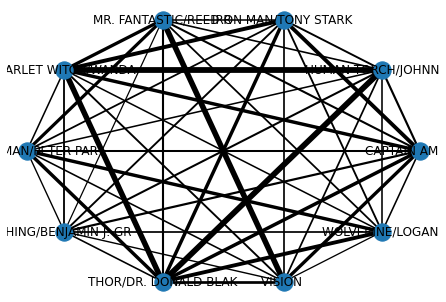

In [116]:
G = nx.from_pandas_edgelist(graph_data, 'hero1', 'hero2', edge_attr=True)
pos = nx.spring_layout(G, k=0.4, iterations=20, scale=0.1)
nx.draw_kamada_kawai(G, with_labels=True, width=graph_data.weights/graph_data.weights.max()*5+1)

In [88]:
G["CAPTAIN AMERICA"]

AtlasView({'HUMAN TORCH/JOHNNY S': {'weights': 70}, 'IRON MAN/TONY STARK ': {'weights': 226}, 'MR. FANTASTIC/REED R': {'weights': 84}, 'SCARLET WITCH/WANDA ': {'weights': 188}, 'SPIDER-MAN/PETER PAR': {'weights': 66}, 'THING/BENJAMIN J. GR': {'weights': 76}, 'THOR/DR. DONALD BLAK': {'weights': 195}, 'VISION ': {'weights': 205}, 'WOLVERINE/LOGAN ': {'weights': 33}})

In [120]:
net = Network(notebook=True)
net.from_nx(G)
net.show("example.html")